# Anatomical Dataset Preprocessing

Here I first apply a skull-stripping, then I calculate the warp to a reference template, in this case MNI space.

In [5]:
# Specify the input and output filenames
anat = 'example_data/raw/anat.nii.gz'
anat_SS = 'example_data/preprocessed/anat_SS.nii.gz'
anat_warped = 'example_data/preprocessed/anat_SS_warped.nii.gz'
template_path = "example_data/MNI152_2009_template_SSW.nii.gz"

In [8]:
# Imports
from nipype.interfaces.afni import SkullStrip, Allineate

In [13]:
# Skull-stripping
skullstrip = SkullStrip()
skullstrip.inputs.in_file = anat
skullstrip.inputs.out_file = anat_SS.format('AFNI')
skullstrip.run()

"""
# Could also be written as:

skullstrip = SkullStrip(
    in_file=anat,
    out_file=anat_SS
).run()
"""

230730-23:50:01,307 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.306984:The intensity in the output dataset is a modified version
230730-23:50:01,307 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.306984:of the intensity in the input volume.
230730-23:50:01,308 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.306984:To obtain a masked version of the input with identical values inside
230730-23:50:01,309 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.306984:the brain, you can either use 3dSkullStrip's -orig_vol option
230730-23:50:01,309 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.306984:or run the following command:
230730-23:50:01,310 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.306984:  3dcalc -a example_data/raw/anat.nii.gz -b example_data/preprocessed/anat_SS_AFNI.nii.gz+orig -expr 'a*step(b)' \
230730-23:50:01,310 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.306984:         -prefix example_data/preprocessed/anat_SS_AFNI.nii.gz_orig_vol
230

In [9]:
skullstrip = SkullStrip(
    in_file=anat,
    out_file=anat_SS
).run()

230809-15:22:31,191 nipype.interface INFO:
	 stderr 2023-08-09T15:22:31.191855:The intensity in the output dataset is a modified version
230809-15:22:31,192 nipype.interface INFO:
	 stderr 2023-08-09T15:22:31.191855:of the intensity in the input volume.
230809-15:22:31,193 nipype.interface INFO:
	 stderr 2023-08-09T15:22:31.191855:To obtain a masked version of the input with identical values inside
230809-15:22:31,193 nipype.interface INFO:
	 stderr 2023-08-09T15:22:31.191855:the brain, you can either use 3dSkullStrip's -orig_vol option
230809-15:22:31,194 nipype.interface INFO:
	 stderr 2023-08-09T15:22:31.191855:or run the following command:
230809-15:22:31,194 nipype.interface INFO:
	 stderr 2023-08-09T15:22:31.191855:  3dcalc -a example_data/raw/anat.nii.gz -b example_data/preprocessed/anat_SS.nii.gz+orig -expr 'a*step(b)' \
230809-15:22:31,195 nipype.interface INFO:
	 stderr 2023-08-09T15:22:31.191855:         -prefix example_data/preprocessed/anat_SS.nii.gz_orig_vol
230809-15:22:

In [14]:
# Registration
allineate = Allineate()
allineate.inputs.in_file = anat_SS.format('AFNI')
allineate.inputs.reference = template_path
allineate.inputs.out_file = anat_warped.format('AFNI')
allineate.run()

"""
# Could also be written as:

allineate = Allineate(
    in_file=anat_SS,
    reference=template_path,
    out_file=anat_warped,
    out_matrix='example_data/preprocessed/anat_to_MNI_affine.1D'
).run()
"""

230730-23:50:01,397 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.397701:++ 3dAllineate: AFNI version=AFNI_23.0.07 (Mar  1 2023) [64-bit]
230730-23:50:01,398 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.397701:++ Authored by: Zhark the Registrator
230730-23:50:01,400 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.400012:++ Source dataset: /home/hign/Documents/GitHub/Neuroscience-Projects/example_data/preprocessed/anat_SS_AFNI.nii.gz
230730-23:50:01,400 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.400012:++ Base dataset:   /home/hign/Documents/GitHub/Neuroscience-Projects/example_data/MNI152_2009_template_SSW.nii.gz
230730-23:50:01,401 nipype.interface INFO:
	 stderr 2023-07-30T23:50:01.400012:++ Loading datasets into memory
230730-23:50:04,975 nipype.interface INFO:
	 stderr 2023-07-30T23:50:04.975926:*+ WARNING: center of mass shifts (-cmass) are turned off, but would be large
230730-23:50:04,977 nipype.interface INFO:
	 stderr 2023-07-30T23:50:04.975926:*+ WA

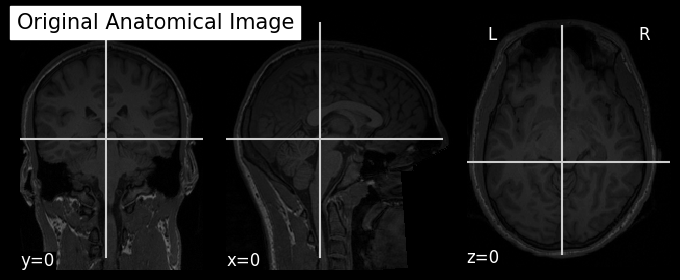

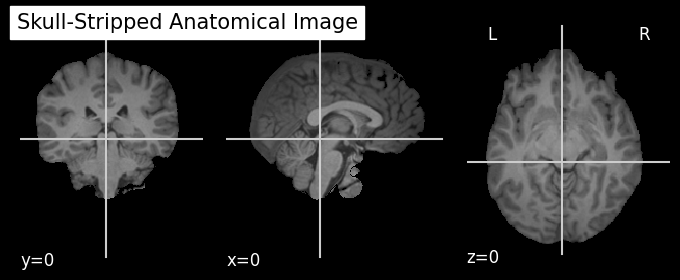

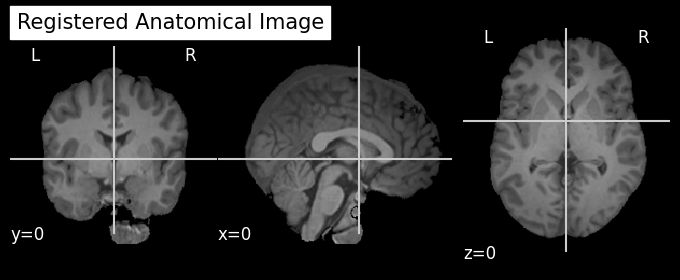

In [14]:
import nibabel as nib
from nilearn import plotting

# Load the images using nibabel
anat_img = nib.load(anat)
anat_SS_img = nib.load(anat_SS)
anat_warped_img = nib.load(anat_warped)

# Plot the images side-by-side using nilearn
plotting.plot_anat(anat_img, title='Original Anatomical Image', cut_coords=(0, 0, 0), display_mode='ortho')
plotting.plot_anat(anat_SS_img, title='Skull-Stripped Anatomical Image', cut_coords=(0, 0, 0), display_mode='ortho')
plotting.plot_anat(anat_warped_img, title='Registered Anatomical Image', cut_coords=(0, 0, 0), display_mode='ortho')

plotting.show()

# Functional Dataset Preprocessing

In [15]:
func = 'example_data/raw/func.nii.gz'

In [16]:
import nipype.interfaces.afni as afni

In [20]:
func_despike = 'example_data/preprocessed/func_despike.nii.gz'

# Despike
despike = afni.Despike(
    in_file=func,
    outputtype='NIFTI_GZ',
    out_file=func_despike
)
despike.run()

230809-15:49:02,986 nipype.interface INFO:
	 stderr 2023-08-09T15:49:02.986778:++ 3dDespike: AFNI version=AFNI_23.0.07 (Mar  1 2023) [64-bit]
230809-15:49:02,987 nipype.interface INFO:
	 stderr 2023-08-09T15:49:02.986778:++ Authored by: RW Cox
230809-15:49:02,987 nipype.interface INFO:
	 stderr 2023-08-09T15:49:02.987678:++ Input dataset is in short format, but output will be in float format
230809-15:49:02,987 nipype.interface INFO:
	 stderr 2023-08-09T15:49:02.987678:++ ignoring first 0 time points, using last 106
230809-15:49:02,988 nipype.interface INFO:
	 stderr 2023-08-09T15:49:02.987678:++ using 106 time points => -corder 4
230809-15:49:02,988 nipype.interface INFO:
	 stderr 2023-08-09T15:49:02.987678:++ Loading dataset example_data/raw/func.nii.gz
230809-15:49:03,331 nipype.interface INFO:
	 stderr 2023-08-09T15:49:03.331919:++ 54945 voxels in the automask [out of 176128 in dataset]
230809-15:49:03,335 nipype.interface INFO:
	 stderr 2023-08-09T15:49:03.335546:++ 84989 voxels i

In [21]:
func_tshift = 'example_data/preprocessed/func_tshift.nii.gz'

# Time Shift
tshift = afni.TShift(
    in_file=func_despike,
    outputtype='NIFTI_GZ',
    out_file=func_tshift
)
tshift.run()

230809-15:49:38,660 nipype.interface INFO:
	 stderr 2023-08-09T15:49:38.660093:++ 3dTshift: AFNI version=AFNI_23.0.07 (Mar  1 2023) [64-bit]
230809-15:49:38,663 nipype.interface INFO:
	 stderr 2023-08-09T15:49:38.663013:*+ WARNING: dataset is already aligned in time!
230809-15:49:38,663 nipype.interface INFO:
	 stderr 2023-08-09T15:49:38.663013:*+ WARNING: ==>> output dataset is just a copy of input dataset


In [27]:
func_align = 'example_data/preprocessed/func_aligned.nii.gz'

# Align - Align functional to anatomical
align = afni.AlignEpiAnatPy(
    anat=anat_warped,
    in_file=func_tshift,
    epi_base=0,
    epi2anat=True
)
align.run()

230809-15:53:39,162 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.162664:#++ align_epi_anat version: 1.63
230809-15:53:39,163 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.162664:#++ turning on volume registration
230809-15:53:39,163 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.162664:#Script is running (command trimmed):
230809-15:53:39,163 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.162664:  3dAttribute DELTA ./example_data/preprocessed/func_tshift.nii.gz
230809-15:53:39,175 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.175323:#Script is running (command trimmed):
230809-15:53:39,176 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.175323:  3dAttribute DELTA ./example_data/preprocessed/func_tshift.nii.gz
230809-15:53:39,182 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.182658:#Script is running (command trimmed):
230809-15:53:39,183 nipype.interface INFO:
	 stdout 2023-08-09T15:53:39.182658:  3dAttribute DELTA ./example_data/preprocessed/anat

230809-16:01:00,246 nipype.interface INFO:
	 stderr 2023-08-09T16:01:00.246074:++ 3dAllineate: AFNI version=AFNI_23.0.07 (Mar  1 2023) [64-bit]
230809-16:01:00,246 nipype.interface INFO:
	 stderr 2023-08-09T16:01:00.246074:++ Authored by: Zhark the Registrator
230809-16:01:00,247 nipype.interface INFO:
	 stderr 2023-08-09T16:01:00.247014:++ Option '-nocmass' disables center-of-mass usage
230809-16:01:00,247 nipype.interface INFO:
	 stderr 2023-08-09T16:01:00.247360:++ Source dataset: ./__tt_anat_SS_warped_ns+orig.HEAD
230809-16:01:00,247 nipype.interface INFO:
	 stderr 2023-08-09T16:01:00.247360:++ Base dataset:   ./__tt_func_tshift_vr_ts_rs_ns+orig.HEAD
230809-16:01:00,247 nipype.interface INFO:
	 stderr 2023-08-09T16:01:00.247360:++ Loading datasets into memory
230809-16:01:01,662 nipype.interface INFO:
	 stderr 2023-08-09T16:01:01.662537:++ 2415480 voxels in -source_automask+4
230809-16:01:01,834 nipype.interface INFO:
	 stderr 2023-08-09T16:01:01.834812:++ Zero-pad: xbot=6 xtop=0
2

230809-16:01:59,898 nipype.interface INFO:
	 stderr 2023-08-09T16:01:59.897470: + - Final    cost = -0.044508 ; 1520 funcs
230809-16:01:59,899 nipype.interface INFO:
	 stderr 2023-08-09T16:01:59.897470: + Final fine fit Parameters:
230809-16:01:59,900 nipype.interface INFO:
	 stderr 2023-08-09T16:01:59.897470:       x-shift= -0.6968   y-shift=  4.3540   z-shift= -4.6623  ...  enorm=  6.4172 mm
230809-16:01:59,900 nipype.interface INFO:
	 stderr 2023-08-09T16:01:59.897470:       z-angle=  2.1134   x-angle=  2.8578   y-angle=  6.0000  ...  total=  7.0181 deg
230809-16:01:59,901 nipype.interface INFO:
	 stderr 2023-08-09T16:01:59.897470:       x-scale=  1.0674   y-scale=  0.7110   z-scale=  1.0560  ...  vol3D=  0.8014=(0.9289)^3 [base bigger than source]
230809-16:01:59,901 nipype.interface INFO:
	 stderr 2023-08-09T16:01:59.897470:     y/x-shear=  0.0616 z/x-shear= -0.0550 z/y-shear= -0.0101
230809-16:01:59,901 nipype.interface INFO:
	 stderr 2023-08-09T16:01:59.897470:*+ WARNING: Parame

230809-16:02:00,538 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606:++ Final parameter search ranges:
230809-16:02:00,538 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606: +       x-shift =  -10.000 ..   10.000
230809-16:02:00,539 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606: +       y-shift =  -10.000 ..   10.000
230809-16:02:00,539 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606: +       z-shift =  -10.000 ..   10.000
230809-16:02:00,543 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606: +       z-angle =   -6.000 ..    6.000
230809-16:02:00,543 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606: +       x-angle =   -6.000 ..    6.000
230809-16:02:00,543 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606: +       y-angle =   -6.000 ..    6.000
230809-16:02:00,543 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.532606: +       x-scale =    0.711 ..    1.406
230809-16:02:00,544 nipype.interface INFO:
	 stderr 20

230809-16:02:00,930 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.930019: + - no weight image
230809-16:02:00,930 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.930019: + * Exit alignment setup routine
230809-16:02:00,931 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.930019:++ using -1Dmatrix_apply
230809-16:02:00,932 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.930019:++ Computing output image
230809-16:02:00,932 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.930019:++ image warp: parameters = 0.9396 0.0515 0.1006 -0.1075 0.0492 1.4035 0.0406 -10.1645 -0.0508 -0.0757 0.9408 5.5826
230809-16:02:00,937 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.937515:++ ========== sub-brick #7 ========== [total CPU to here=0.0 s]
230809-16:02:00,938 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.938346: + * Enter alignment setup routine
230809-16:02:00,938 nipype.interface INFO:
	 stderr 2023-08-09T16:02:00.938346: + - copying source image
230809-16:02:00,979 

230809-16:02:01,362 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.358842:++ image warp: parameters = 0.9396 0.0520 0.1006 -0.1202 0.0488 1.4035 0.0412 -10.1698 -0.0508 -0.0766 0.9407 5.6179
230809-16:02:01,369 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.369412:++ ========== sub-brick #15 ========== [total CPU to here=0.0 s]
230809-16:02:01,370 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.370144: + * Enter alignment setup routine
230809-16:02:01,370 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.370464: + - copying source image
230809-16:02:01,419 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.418917: + - no weight image
230809-16:02:01,420 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.418917: + * Exit alignment setup routine
230809-16:02:01,421 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.418917:++ using -1Dmatrix_apply
230809-16:02:01,422 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.418917:++ Computing output image
230809-16:02:01,423

230809-16:02:01,808 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.808877: + - copying source image
230809-16:02:01,856 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.855990: + - no weight image
230809-16:02:01,856 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.855990: + * Exit alignment setup routine
230809-16:02:01,857 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.855990:++ using -1Dmatrix_apply
230809-16:02:01,857 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.855990:++ Computing output image
230809-16:02:01,858 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.858554:++ image warp: parameters = 0.9396 0.0536 0.1014 -0.1630 0.0477 1.4034 0.0410 -10.1414 -0.0515 -0.0766 0.9407 5.6532
230809-16:02:01,865 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.865688:++ ========== sub-brick #24 ========== [total CPU to here=0.0 s]
230809-16:02:01,866 nipype.interface INFO:
	 stderr 2023-08-09T16:02:01.866731: + * Enter alignment setup routine
230809-16:02:01,867

230809-16:02:02,306 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.303569:++ Computing output image
230809-16:02:02,307 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.306880:++ image warp: parameters = 0.9396 0.0542 0.1017 -0.1793 0.0473 1.4034 0.0408 -10.1229 -0.0518 -0.0763 0.9406 5.6439
230809-16:02:02,310 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.310937:++ ========== sub-brick #32 ========== [total CPU to here=0.0 s]
230809-16:02:02,311 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.311717: + * Enter alignment setup routine
230809-16:02:02,312 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.312196: + - copying source image
230809-16:02:02,356 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.356563: + - no weight image
230809-16:02:02,357 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.356563: + * Exit alignment setup routine
230809-16:02:02,358 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.358651:++ using -1Dmatrix_apply
230809-16:02:02,359

230809-16:02:02,749 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.749817: + * Enter alignment setup routine
230809-16:02:02,750 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.749817: + - copying source image
230809-16:02:02,794 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.794811: + - no weight image
230809-16:02:02,795 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.794811: + * Exit alignment setup routine
230809-16:02:02,796 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.794811:++ using -1Dmatrix_apply
230809-16:02:02,796 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.794811:++ Computing output image
230809-16:02:02,797 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.794811:++ image warp: parameters = 0.9396 0.0547 0.1019 -0.1938 0.0470 1.4034 0.0403 -10.1098 -0.0520 -0.0756 0.9406 5.6306
230809-16:02:02,802 nipype.interface INFO:
	 stderr 2023-08-09T16:02:02.801977:++ ========== sub-brick #41 ========== [total CPU to here=0.0 s]
230809-16:02:02,802

230809-16:02:03,226 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.225028:++ using -1Dmatrix_apply
230809-16:02:03,227 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.225028:++ Computing output image
230809-16:02:03,228 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.225028:++ image warp: parameters = 0.9396 0.0554 0.1022 -0.2204 0.0465 1.4034 0.0401 -10.0961 -0.0523 -0.0754 0.9406 5.6392
230809-16:02:03,233 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.233929:++ ========== sub-brick #49 ========== [total CPU to here=0.0 s]
230809-16:02:03,234 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.234817: + * Enter alignment setup routine
230809-16:02:03,235 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.234817: + - copying source image
230809-16:02:03,280 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.280841: + - no weight image
230809-16:02:03,281 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.280841: + * Exit alignment setup routine
230809-16:02:03,282

230809-16:02:03,663 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.663822:++ ========== sub-brick #57 ========== [total CPU to here=0.0 s]
230809-16:02:03,664 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.664843: + * Enter alignment setup routine
230809-16:02:03,665 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.664843: + - copying source image
230809-16:02:03,706 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.706594: + - no weight image
230809-16:02:03,707 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.706594: + * Exit alignment setup routine
230809-16:02:03,707 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.706594:++ using -1Dmatrix_apply
230809-16:02:03,708 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.706594:++ Computing output image
230809-16:02:03,708 nipype.interface INFO:
	 stderr 2023-08-09T16:02:03.706594:++ image warp: parameters = 0.9396 0.0557 0.1025 -0.2239 0.0463 1.4034 0.0402 -10.0885 -0.0525 -0.0757 0.9406 5.6570
230809-16:02:03,717

230809-16:02:04,154 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.154505: + - no weight image
230809-16:02:04,155 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.154505: + * Exit alignment setup routine
230809-16:02:04,156 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.154505:++ using -1Dmatrix_apply
230809-16:02:04,156 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.154505:++ Computing output image
230809-16:02:04,158 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.158454:++ image warp: parameters = 0.9396 0.0557 0.1025 -0.2233 0.0463 1.4034 0.0399 -10.0917 -0.0526 -0.0752 0.9406 5.6456
230809-16:02:04,167 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.167052:++ ========== sub-brick #66 ========== [total CPU to here=0.0 s]
230809-16:02:04,168 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.168094: + * Enter alignment setup routine
230809-16:02:04,168 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.168094: + - copying source image
230809-16:02:04,211

230809-16:02:04,588 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.586391:++ image warp: parameters = 0.9396 0.0560 0.1031 -0.2375 0.0461 1.4034 0.0400 -10.0948 -0.0532 -0.0755 0.9405 5.6686
230809-16:02:04,593 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.593533:++ ========== sub-brick #74 ========== [total CPU to here=0.0 s]
230809-16:02:04,594 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.594458: + * Enter alignment setup routine
230809-16:02:04,595 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.594458: + - copying source image
230809-16:02:04,638 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.638442: + - no weight image
230809-16:02:04,639 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.638442: + * Exit alignment setup routine
230809-16:02:04,639 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.638442:++ using -1Dmatrix_apply
230809-16:02:04,640 nipype.interface INFO:
	 stderr 2023-08-09T16:02:04.638442:++ Computing output image
230809-16:02:04,640

230809-16:02:05,34 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.033690: + - copying source image
230809-16:02:05,80 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.080600: + - no weight image
230809-16:02:05,81 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.080600: + * Exit alignment setup routine
230809-16:02:05,82 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.080600:++ using -1Dmatrix_apply
230809-16:02:05,82 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.080600:++ Computing output image
230809-16:02:05,83 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.080600:++ image warp: parameters = 0.9396 0.0561 0.1037 -0.2414 0.0460 1.4034 0.0400 -10.0834 -0.0537 -0.0755 0.9405 5.6956
230809-16:02:05,90 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.090539:++ ========== sub-brick #83 ========== [total CPU to here=0.0 s]
230809-16:02:05,91 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.091261: + * Enter alignment setup routine
230809-16:02:05,91 nipype.i

230809-16:02:05,522 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.520638:++ Computing output image
230809-16:02:05,522 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.520638:++ image warp: parameters = 0.9395 0.0563 0.1044 -0.2453 0.0458 1.4033 0.0409 -10.0884 -0.0545 -0.0769 0.9403 5.7524
230809-16:02:05,527 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.527732:++ ========== sub-brick #91 ========== [total CPU to here=0.0 s]
230809-16:02:05,528 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.528485: + * Enter alignment setup routine
230809-16:02:05,528 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.528948: + - copying source image
230809-16:02:05,570 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.570526: + - no weight image
230809-16:02:05,571 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.570526: + * Exit alignment setup routine
230809-16:02:05,571 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.571929:++ using -1Dmatrix_apply
230809-16:02:05,572

230809-16:02:05,953 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.953552: + * Enter alignment setup routine
230809-16:02:05,954 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.953552: + - copying source image
230809-16:02:05,999 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.999110: + - no weight image
230809-16:02:06,0 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.999110: + * Exit alignment setup routine
230809-16:02:06,0 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.999110:++ using -1Dmatrix_apply
230809-16:02:06,1 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.999110:++ Computing output image
230809-16:02:06,1 nipype.interface INFO:
	 stderr 2023-08-09T16:02:05.999110:++ image warp: parameters = 0.9395 0.0566 0.1047 -0.2497 0.0456 1.4033 0.0408 -10.0861 -0.0548 -0.0768 0.9403 5.7636
230809-16:02:06,8 nipype.interface INFO:
	 stderr 2023-08-09T16:02:06.008420:++ ========== sub-brick #100 ========== [total CPU to here=0.0 s]
230809-16:02:06,9 nipype.int

230809-16:02:06,454 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.452401:#Script is running (command trimmed):
230809-16:02:06,454 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.452401:  3dNotes -h "align_epi_anat.py -anat \
230809-16:02:06,455 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.452401: example_data/preprocessed/anat_SS_warped.nii.gz -epi2anat -epi_base 0 \
230809-16:02:06,455 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.452401: -epi example_data/preprocessed/func_tshift.nii.gz -suffix _al -tshift on \
230809-16:02:06,456 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.452401: -volreg on" \
230809-16:02:06,456 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.452401: ./func_tshift_al+orig
230809-16:02:06,457 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.452401:
230809-16:02:06,492 nipype.interface INFO:
	 stdout 2023-08-09T16:02:06.491965:#++ Removing all the temporary files
230809-16:02:06,492 nipype.interface INFO:
	 stdout 2023-08-09T16

In [ ]:

# 3. 

# 4. Talairach Transformation
adwarp = afni.AutoWarp(
    outputtype='NIFTI_GZ',
    dxyz=3,
    base=template_path,  # Using the MNI template you provided
    source=align.outputs.epi_anat
)
adwarp.run()

# 5. Volume Registration (motion correction)
volreg = afni.Volreg(
    in_file=adwarp.outputs.source_warp,
    basefile=adwarp.outputs.source_warp,
    outputtype='NIFTI_GZ',
    zpad=4,
    out_file='example_data/preprocessed/func_volreg.nii.gz'
)
volreg.run()

# 6. Blur (spatial smoothing)
blur = afni.BlurInMask(
    in_file=volreg.outputs.out_file,
    fwhm=4,
    out_file='example_data/preprocessed/func_blur.nii.gz'
)
blur.run()

# 7. Masking
automask = afni.Automask(
    in_file=blur.outputs.out_file,
    out_file='example_data/preprocessed/func_mask.nii.gz'
)
automask.run()

# 8. Scaling
scale = afni.Calc(
    in_file_a=automask.outputs.out_file,
    expr='a*100/a',
    outputtype='NIFTI_GZ',
    out_file='example_data/preprocessed/func_scaled.nii.gz'
)
scale.run()

# 9. Regression (assuming motion parameters for noise regressors)
# Note: You'll need motion parameters from volreg step
# Here is a placeholder, actual regression step would depend on the noise model
regress = afni.Retroicor(
    in_file=scale.outputs.out_file,
    polort=5,
    outputtype='NIFTI_GZ',
    out_file='example_data/preprocessed/func_regress.nii.gz'
)
# regress.run()  # Uncomment after setting the required parameters

# Note: Some steps, especially 'Regress', might need additional input files or parameters.


# Another Protocol using AFNI from Commandline

## SSWarper

Even though SSwarper command from AFNI is not present in nipype library, it can be called via the CommandLine method of nipype's base package. AFNI's documentation notes that SSwarper can be used to

    + to skull-strip the brain, and
    + to calculate the warp to a reference template/standard space
    
They also note that 'This program cordially ties in directly with afni_proc.py, so you can
run it beforehand, check the results, and then provide both the
skull-stripped volume and the warps to the processing program.'

In [3]:
from nipype.interfaces.base import CommandLine
import os

# Make a separate directory for SSwarper outputs
out_path = "example_data/preprocessed/SSwarper_outputs"
os.makedirs(out_path, exist_ok=True)

in_path = 'example_data/raw/anat.nii.gz'
mni_path = 'example_data/MNI152_2009_template_SSW.nii.gz'

sswarper_cmd = CommandLine(command='@SSwarper')
sswarper_cmd.inputs.args = '-input {} -subid Sub1 -base {} -odir {}'.format(in_path, mni_path, out_path)
sswarper_cmd.run()

230815-16:10:41,452 nipype.interface INFO:
	 stdout 2023-08-15T16:10:41.452021:++ Starting: @SSwarper v2.6
230815-16:10:41,458 nipype.interface INFO:
	 stdout 2023-08-15T16:10:41.458164:++ Default OMP_NUM_THREADS is 16
230815-16:10:41,505 nipype.interface INFO:
	 stdout 2023-08-15T16:10:41.505706:++ Prepare for running @djunct_overlap_check (ver = 0.46)
230815-16:10:41,509 nipype.interface INFO:
	 stderr 2023-08-15T16:10:41.509548:++ 3dcalc: AFNI version=AFNI_23.0.07 (Mar  1 2023) [64-bit]
230815-16:10:41,510 nipype.interface INFO:
	 stderr 2023-08-15T16:10:41.509548:++ Authored by: A cast of thousands
230815-16:10:41,870 nipype.interface INFO:
	 stderr 2023-08-15T16:10:41.870367:++ Output dataset ./example_data/preprocessed/SSwarper_outputs/__workdir_olap_5JMuNBRVHCT/olapch_0_cp_ulay.nii
230815-16:10:41,873 nipype.interface INFO:
	 stdout 2023-08-15T16:10:41.873238:++ Just copy olay, bc ulay will get regridded
230815-16:10:41,875 nipype.interface INFO:
	 stderr 2023-08-15T16:10:41.874

230815-16:10:51,748 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.746802:
230815-16:10:51,753 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.753005:
230815-16:10:51,754 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.753005:+* Removing temporary image directory './__tmp_chauf_LxRycoTGa2y'.
230815-16:10:51,755 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.753005:
230815-16:10:51,770 nipype.interface INFO:
	 stderr 2023-08-15T16:10:51.770422:[1]  + Done                          Xvfb :65 -screen 0 1024x768x24
230815-16:10:51,778 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.778516:
230815-16:10:51,779 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.778516:++ DONE (good exit)
230815-16:10:51,780 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.778516:   see: ./img00*
230815-16:10:51,780 nipype.interface INFO:
	 stdout 2023-08-15T16:10:51.778516:
230815-16:10:51,842 nipype.interface INFO:
	 stderr 2023-08-15T16:10:51.842924:+++ Transforming all input to rgb

KeyboardInterrupt: 